In [9]:
import pandas as pd

#Spacy is a pre-prep NLP library
import spacy
#loading English language module
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



#import CSV
data_raw = pd.read_csv('dialogs.csv', sep='\\t' )
data_input = data_raw["\"input"]


<ipython-input-9-ab9c08f80bbd>:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw = pd.read_csv('dialogs.csv', sep='\\t' )


In [10]:
#Clean CSV import
for x in range(len(data_input)):
   data_input.iloc[x] = data_input.iloc[x].strip("\"")

In [11]:
print(data_input)

0                                  hi, how are you doing?
1                           i'm fine. how about yourself?
2                     i'm pretty good. thanks for asking.
3                       no problem. so how have you been?
4                        i've been great. what about you?
                              ...                        
3720      that's a good question. maybe it's not old age.
3721                                are you right-handed?
3722                                    yes. all my life.
3723    you're wearing out your right hand. stop using...
3724          but i do all my writing with my right hand.
Name: "input, Length: 3725, dtype: object


In [12]:
#Convert input into spacy tokens - accses all indidual words as: [token.text for token in <input>]
data_spacy = data_input

for x in range(len(data_spacy)):
   data_spacy.iloc[x] = nlp(data_spacy.iloc[x])




In [13]:
data_raw = pd.read_csv('dialogs.csv', sep='\\t' )
data_text = data_raw["\"input"]
for x in range(len(data_text)):
   data_text.iloc[x] = data_text.iloc[x].strip("\"")

<ipython-input-13-5f822c865862>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw = pd.read_csv('dialogs.csv', sep='\\t' )


In [14]:
for x in range(len(data_spacy)):
    print ([(token.text, token.lemma_, token.pos_) for token in data_spacy[x]])

[('hi', 'hi', 'INTJ'), (',', ',', 'PUNCT'), ('how', 'how', 'ADV'), ('are', 'be', 'AUX'), ('you', 'you', 'PRON'), ('doing', 'do', 'VERB'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ("'m", 'be', 'VERB'), ('fine', 'fine', 'ADJ'), ('.', '.', 'PUNCT'), ('how', 'how', 'ADV'), ('about', 'about', 'ADP'), ('yourself', 'yourself', 'PRON'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ("'m", 'be', 'VERB'), ('pretty', 'pretty', 'ADV'), ('good', 'good', 'ADJ'), ('.', '.', 'PUNCT'), ('thanks', 'thank', 'NOUN'), ('for', 'for', 'ADP'), ('asking', 'ask', 'VERB'), ('.', '.', 'PUNCT')]
[('no', 'no', 'DET'), ('problem', 'problem', 'NOUN'), ('.', '.', 'PUNCT'), ('so', 'so', 'ADV'), ('how', 'how', 'ADV'), ('have', 'have', 'AUX'), ('you', 'you', 'PRON'), ('been', 'be', 'VERB'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ("'ve", "'ve", 'AUX'), ('been', 'be', 'VERB'), ('great', 'great', 'ADJ'), ('.', '.', 'PUNCT'), ('what', 'what', 'PRON'), ('about', 'about', 'ADP'), ('you', 'you', 'PRON'), ('?', '?', 'PUNCT')]
[(

[('female', 'female', 'ADJ'), ('singers', 'singer', 'NOUN'), ('are', 'be', 'AUX'), ('supposed', 'suppose', 'VERB'), ('to', 'to', 'PART'), ('be', 'be', 'VERB'), ('pretty', 'pretty', 'ADJ'), ('.', '.', 'PUNCT')]
[('singers', 'singer', 'NOUN'), ('are', 'be', 'AUX'), ('supposed', 'suppose', 'VERB'), ('to', 'to', 'PART'), ('sound', 'sound', 'VERB'), ('good', 'good', 'ADJ'), ('.', '.', 'PUNCT')]
[('they', 'they', 'PRON'), ('should', 'should', 'AUX'), ('look', 'look', 'VERB'), ('good', 'good', 'ADJ'), (',', ',', 'PUNCT'), ('too', 'too', 'ADV'), ('.', '.', 'PUNCT')]
[('there', 'there', 'PRON'), ('are', 'be', 'AUX'), ('lots', 'lot', 'NOUN'), ('of', 'of', 'ADP'), ('ugly', 'ugly', 'ADJ'), ('men', 'man', 'NOUN'), ('singers', 'singer', 'NOUN'), ('.', '.', 'PUNCT')]
[('men', 'man', 'NOUN'), ('singers', 'singer', 'NOUN'), ('do', 'do', 'AUX'), ("n't", "n't", 'PART'), ('have', 'have', 'VERB'), ('to', 'to', 'PART'), ('look', 'look', 'VERB'), ('good', 'good', 'ADJ'), ('.', '.', 'PUNCT')]
[('then', 'then'

In [73]:
vec = TfidfVectorizer(stop_words="english") #kwarg: stop_words="english"
vec.fit(data_text)

features = vec.transform(data_text)

pd.DataFrame(vec.transform(data_text).toarray(), columns=sorted(vec.vocabulary_.keys()))

,00,000,01,10,100,101,11,12,120,13,...,yells,yes,yesterday,yikes,york,young,yuck,yy,zip,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.528898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
cls = MiniBatchKMeans(n_clusters=61)
cls.fit(features)


MiniBatchKMeans(n_clusters=61)

In [75]:
cls.predict(features)



array([20,  1, 42, ..., 43, 38, 38])

In [76]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data_text.index.values
cluster_map['text'] = data_text.values
cluster_map['cluster'] = cls.labels_

In [78]:

cluster_map[cluster_map.cluster == 1]

,data_index,text,cluster
1,1,i'm fine. how about yourself?,1
3,3,no problem. so how have you been?,1
6,6,what school do you go to?,1
7,7,i go to pcc.,1
9,9,it's okay. it's a really big campus.,1
...,...,...,...
3711,3711,"her face is really fat, but they say the swell...",1
3712,3712,and then will she look normal again?,1
3713,3713,i guess so.,1
3715,3715,what's wrong with it?,1


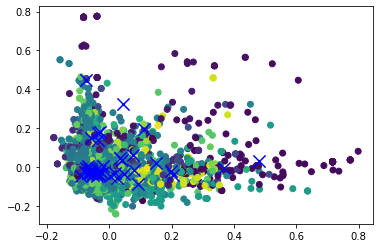

In [42]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter( reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


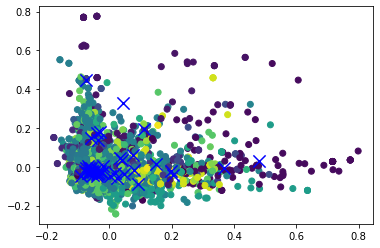

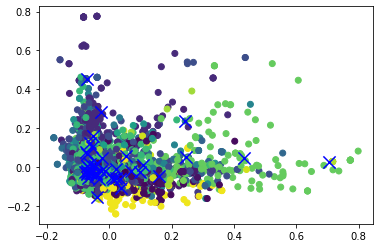

In [43]:
cls = MiniBatchKMeans(n_clusters=43)
cls.fit(features)
cls.predict(features)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter( reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
